<a href="https://colab.research.google.com/github/Jenithz/Perfomance-index-predict/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload() #To upload my given data set

Saving Student_Performance.csv to Student_Performance.csv


In [4]:
import pandas as pd # Importing necessary libraries

In [6]:
df = pd.read_csv("Student_Performance.csv")  # Loading the dataset
print(df.head()) # Displaying the first few rows of the dataset

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


In [19]:
print(df.info())  # Shows data types and missing values
print(df.describe())  # Summary statistics
print(df.isnull().sum())  # Check for missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int64  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB
None
       Hours Studied  Previous Scores  Extracurricular Activities  \
count   10000.000000     10000.000000                10000.000000   
mean        4.992900        69.445700                    0.494800   
std         2.589309        17.343152                    0.499998   
min         1.000000        40.000000                   

In [11]:
df.replace({"Yes": 1, "No": 0}, inplace=True)   #The dataset has yes or no but we need 1 or 0 so we are replacing it

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# Set figure size for better visibility
plt.figure(figsize=(8,6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

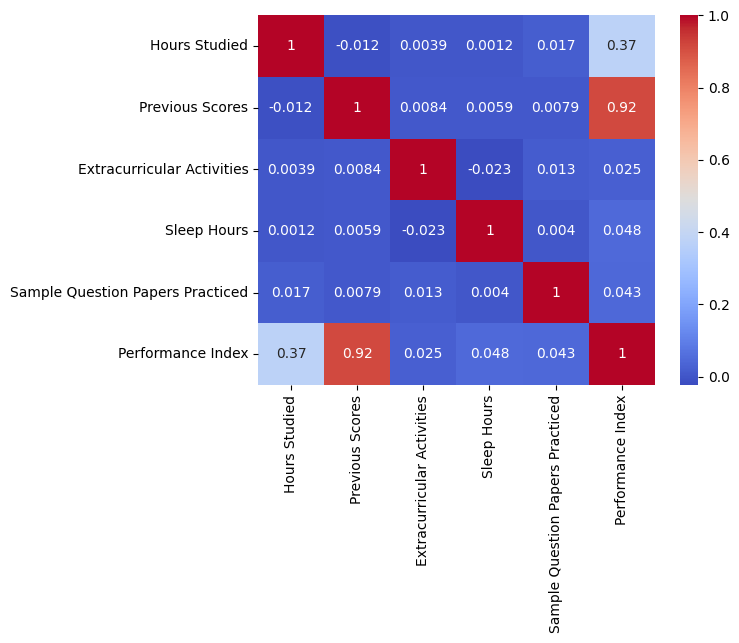

In [16]:
# Create a heatmap to show correlation between features
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
# Display the heatmap
plt.show()

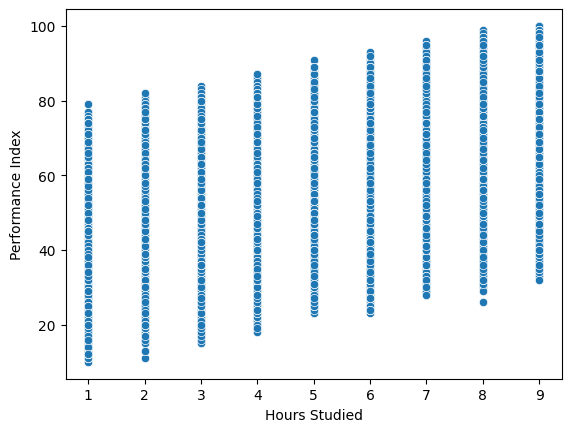

In [18]:
# Scatterplot to analyze hours studied and performance index
sns.scatterplot(x=df["Hours Studied"], y=df["Performance Index"])
plt.show()

In [20]:

# Import necessary library for machine learning
from sklearn.model_selection import train_test_split

# Define the target variable (which we have taken performance index)
y = df["Performance Index"]  # Change column name if needed

# Define the features (all columns except the target variable)
X = df.drop(columns=["Performance Index"])  # Drop the target column

# Display the first few rows of X and y
print(X.head())
print(y.head())


   Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0              7               99                           1            9   
1              4               82                           0            4   
2              8               51                           1            7   
3              5               52                           1            5   
4              7               75                           0            8   

   Sample Question Papers Practiced  
0                                 1  
1                                 2  
2                                 2  
3                                 2  
4                                 5  
0    91.0
1    65.0
2    45.0
3    36.0
4    66.0
Name: Performance Index, dtype: float64


In [21]:
# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of train & test sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (8000, 5) (8000,)
Testing set shape: (2000, 5) (2000,)


In [22]:
# Import Linear Regression model
from sklearn.linear_model import LinearRegression

# Create an instance of the model
model = LinearRegression()

# Train (fit) the model using training data
model.fit(X_train, y_train)

# Print model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: -33.92194621555638
Coefficients: [2.85248393 1.0169882  0.60861668 0.47694148 0.19183144]


In [23]:
# Predict target values for the test set
y_pred = model.predict(X_test)

# Display first 5 predictions
print("First 5 Predictions:", y_pred[:5])

First 5 Predictions: [54.71185392 22.61551294 47.90314471 31.28976748 43.00457042]


In [25]:
# To evaluate model performance

# Import evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate errors
mae = mean_absolute_error(y_test, y_pred)  # Measures absolute difference
mse = mean_squared_error(y_test, y_pred)  # Measures squared difference
r2 = r2_score(y_test, y_pred)  # Measures how well the model explains variance

# Print evaluation results
print("Mean Absolute Error (MAE):", mae) # Average difference between predicted and actual values (lower is better).
print("Mean Squared Error (MSE):", mse) # MSE – Similar to MAE but squares the errors (lower is better).
print("R² Score:", r2) # R² Score – Ranges from 0 to 1 (higher is better); shows how well the model explains variation in performance.


Mean Absolute Error (MAE): 1.6111213463123044
Mean Squared Error (MSE): 4.082628398521853
R² Score: 0.9889832909573145


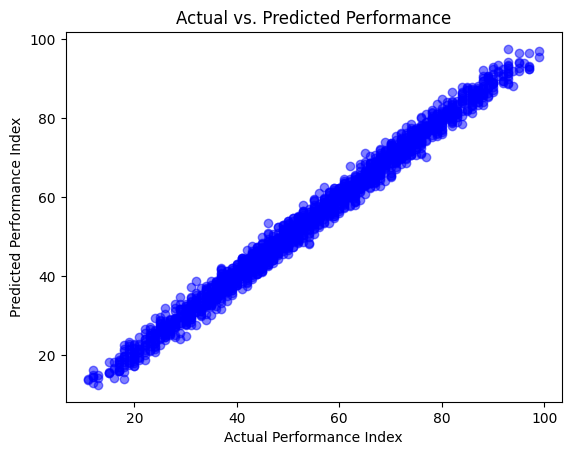

In [26]:
import matplotlib.pyplot as plt

# Create scatter plot for actual vs. predicted values
plt.scatter(y_test, y_pred, color="blue", alpha=0.5)
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Actual vs. Predicted Performance")
plt.show()
